### 

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author1: juan
@author2: carlos
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from numpy import asarray
from numpy import savetxt

import os

import time
from scipy import stats

import warnings
import numpy as np
from numpy import nan
warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [2]:
#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2022-11-26'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

casos = casos.append(FaltanCasos)
sintomas = sintomas.append(FaltanSintomas)


En casos positivos no hay datos de []
En sintomas no hay datos de []


/tmp/ipykernel_4660/3904468643.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  casos = casos.append(FaltanCasos)
/tmp/ipykernel_4660/3904468643.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sintomas = sintomas.append(FaltanSintomas)


In [3]:
#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

casosDepto = {}
for depto in departamentos:
    casosDepto[depto] = pd.DataFrame(casos.loc[casos['departamento'] == depto])
    casosDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    casosDepto[depto] = casosDepto[depto].set_index('municipio')
    
sintomasDepto = {}

for depto in departamentos:
    sintomasDepto[depto] = pd.DataFrame(sintomas.loc[sintomas['departamento'] == depto])
    sintomasDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    sintomasDepto[depto] = sintomasDepto[depto].set_index('municipio')
    
pobDepto = {}

for depto in departamentos:
    pobDepto[depto] = pd.DataFrame(poblaciones.loc[poblaciones['departamento'] == depto])
    pobDepto[depto].drop(['codigo_municipio','departamento'], axis = 1, inplace = True)
    pobDepto[depto] = pobDepto[depto].set_index('municipio')
    

In [4]:
#municipios

In [5]:
#==============================================================================
#DATOS POR DEPARTAMENTO UTILES
#==============================================================================
fechas = casosDepto['GUATEMALA'].columns.values
fechas1 = fechas[7::14]
fechas2 = fechas1[1:len(fechas1)]
diasMediaMovil = 14

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    pob = 0
    cantidadMunicipios = len(casosDepto[depto].index)
    positivosDepto = np.zeros(len(fechas))
    sintomasTotalesDepto = np.zeros(len(fechas))
    mediamovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    
    for muni in casosDepto[depto].index:
        
        positivos = casosDepto[depto].loc[muni].values.astype(float)
        sintomasTotales = sintomasDepto[depto].loc[muni].values.astype(float)
        
        positivosDepto = positivos + positivosDepto
        
        sintomasTotalesDepto = sintomasTotalesDepto + sintomasTotales
        
        pob += pobDepto[depto].loc[muni].values[0]
        
    for i in range(len(positivosDepto)-diasMediaMovil):
        mediamovilDepto[i] = np.mean(positivosDepto[i:i+diasMediaMovil]) #LINEA IMPORTANTE
    
    NOMBREDEPTO.append(depto)
    Poblacion.append(pob)
    POSITIVOSDEPTO.append(mediamovilDepto)#POSITIVOSDEPTO.append(positivosDepto)
    SINTOMASDEPTO.append(sintomasTotalesDepto)
    
acumuladosReportados = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))
acumuladosSintomas = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))

for j in range(len(NOMBREDEPTO)):
    for i in range(len(POSITIVOSDEPTO[0])-1):
        if i ==0:
            acumuladosReportados[j][i] = POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = SINTOMASDEPTO[j][i]
            
        else:
            acumuladosReportados[j][i] = acumuladosReportados[j][i-1] + POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = acumuladosSintomas[j][i-1] + SINTOMASDEPTO[j][i]
#HASTA ACA LIMPIEZA Y EXTRACCION DE DATOS


In [6]:
#==============================================================================
#ESTIMACIONES DE BETA y OTRAS VARIABLES DEL MODELO SIR
#==============================================================================
#INICIALIZACION DE VARIABLES
gamma = 1./21.
A = acumuladosReportados #TOTAL DE INDIVIDUOS QUE SE HAN INFECTADO.
dA = POSITIVOSDEPTO #CASOS NUEVOS REPORTADOS CADA DIA POR CADA DEPARTAMENTO
R = np.zeros((len(A),len(A[0])))
I = A - R
S = np.zeros((len(A),len(A[0])))
Beta = np.zeros((len(A),len(A[0])))
Rt = np.zeros((len(A),len(A[0])))
R0 = np.zeros((len(A),len(A[0])))

inicio = 100

for i in range(len(A)):
    for j in range(len(A[0])):
        S[i][j] = Poblacion[i] - A[i][j] #ECUACION (4.37)
        
for i in range(len(A)):
    N = Poblacion[i]
    for j in range(len(A[0])-1):
        if j>20: #porque empezamos desde j=0.
            R[i][j] = dA[i][j-21] + R[i][j-1] #ECUACION (4.38)
        else:
            R[i][j] = 0
            
        if A[i][j] - R[i][j] <= 0:
            I[i][j] = I[i][j-1]
        else:
            I[i][j] = A[i][j] - R[i][j] #ECUACION (4.39)
        S[i][j] = N - I[i][j] - R[i][j]
        Beta[i][j] = dA[i][j+1]/(S[i][j]*I[i][j])*N ##ECUACION (5.1)
        #mas adelante quitar el ultimo de beta porque es cero.
        Rt[i][j] = Beta[i][j]/gamma * S[i][j]/N
        R0[i][j] = Beta[i][j]/gamma
        
        if A[i][j] <= 0:
            A[i][j] = A[i][j-1]


In [7]:
def Normalizar(x, Poblacion):
    y = np.array(x)
    for i in range(len(y)):
        y[i] = y[i]/Poblacion[i]
    return y
    

In [8]:

In = Normalizar(I,Poblacion)
Sn = Normalizar(S,Poblacion)
Rn = Normalizar(R,Poblacion)
dAn = Normalizar(dA,Poblacion)
An = Normalizar(A,Poblacion)
Bn = Normalizar(Beta,Poblacion)

In [9]:
#Extension y Superficie  son listas que contienen el Area Superficial (en km²) de cada departamento
#en el mismo orden que aparecen en la lista NOMBREDEPTO

In [10]:
Extension = [2126, 2376, 7400, 1953, 465, 8378, 2995, 3216, 3791, 1979, 1061,  4384,  2510,  35854, 3124, 1856, 8686, 1922, 2063, 2690, 9038, 1061]

In [11]:
Superficie = [2126, 2376, 7400, 1953, 465, 8378, 2995, 3216, 3791, 1979, 1061,  4384,  2510,  35854, 3124, 1856, 8686, 1922, 2063, 2690, 9038, 1061]

In [12]:
#obtenido con osmnx
#Total de calles de cada departamento conectadas a un solo nodo.
Calles=[3703,1742,  3363,  1177, 2054, 2882, 1260, 2088, 2461,  2097, 924, 722, 1521, 3059, 659, 1290, 3237, 881, 1168, 1260, 2708,  876]

In [13]:
#Perimetro (en km) de cada departamento
Perimetro = [225.63, 242.32, 403.12, 284.76, 126.74, 575.44,  275.77, 346.13, 345.89, 206.51, 163.71, 338.64, 277.38, 36419.1, 299.25,  246.02, 498.14, 203.99, 212.44, 281.65, 455.72, 166.84]

In [14]:
#Densidad superficial de calles conectadas a un solo nodo
Densidad_Calles = np.array(Calles)/np.array(Superficie)

In [15]:
npExtension = np.array(Extension)
npPoblacion = np.array(Poblacion)

Densidad = npPoblacion/npExtension #Densidad Poblacional
Densidad

array([1653.70413923,  185.84974747,  185.36162162,  458.98719918,
        838.51827957,  126.86762951,  147.25609349,  171.66386816,
        309.20865207,  370.55987873,  440.40150801,  180.57458942,
        241.15498008,   17.11036426,  104.95710627,  199.93103448,
        152.96661294,  100.45213319,  191.09743093,   99.52342007,
         48.73810578,  458.70593779])

In [16]:

Beta_MAX = [] #Contiene el maximo de los nuevos reportes diarios de cada departamento
for i in range(len(NOMBREDEPTO)):
    my_array = Beta[i][80:]
    new_array = my_array[np.logical_not(np.isnan(my_array))]
    new_array = new_array[np.logical_not(np.isinf(new_array))]
    Beta_MAX.append(max(new_array))


In [17]:
import numpy as np
from numpy import nan
dA_MAX = []
for i in range(len(NOMBREDEPTO)):
    my_array = dA[i][80:]
    new_array = my_array[np.logical_not(np.isnan(my_array))]
    new_array = new_array[np.logical_not(np.isinf(new_array))]
    dA_MAX.append(max(new_array))

In [19]:
#Proponemos dos cantidades para medir la conectividad:
#Densidad superficial de calles y
#Densidad perimetral de calles
Densidad_Calles_superficial1 = np.array(Calles)/np.array(Superficie) 
Densidad_Calles_perimetral1 = np.array(Calles)/np.array(Perimetro) 

#Nota: La normalizacion del maximo de reportes diarios se hace respecto a la superficie del departamento
#Normalizar respecto a la poblacion no dio resultados adecuados.
dA_MAX_n = Normalizar(dA_MAX, Superficie)
Beta_MAX_n = Normalizar(Beta_MAX, Superficie)

In [20]:
#Fuuncion para el ajuste lineal
def myfunc(x):
    X = []
    for i in range(len(x)):
        X.append(slope * x[i] + intercept)
    return X

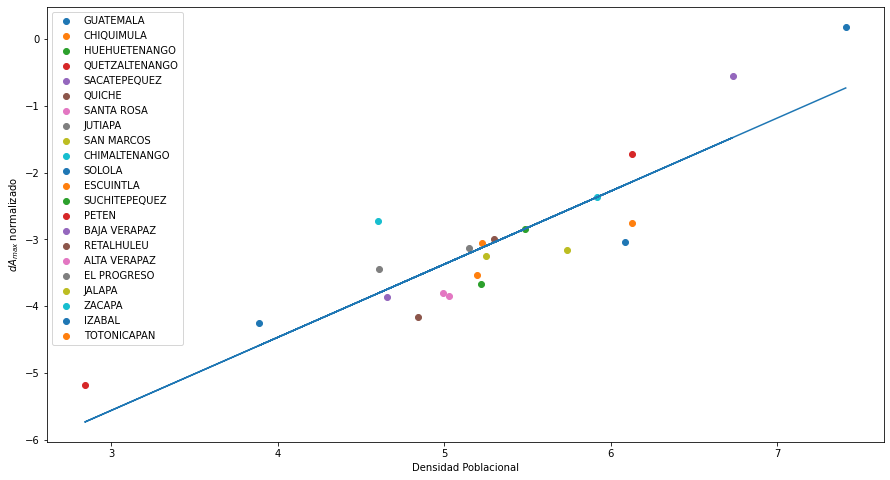

In [21]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(Densidad[i]))
    y.append(np.log(np.array(dA_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(Densidad[i]), np.log(np.array(dA_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.xlabel("Densidad Poblacional")
plt.ylabel("$dA_{max}$ normalizado")
plt.savefig('Percolacion/'+'DensidadPoblacional.pdf', bbox_inches = 'tight')

plt.show()

In [22]:
slope, intercept, r, p, std_err

(1.0947665555879793,
 -8.844410735727882,
 0.8840901477840667,
 4.8568731620514116e-08,
 0.12939604079412187)

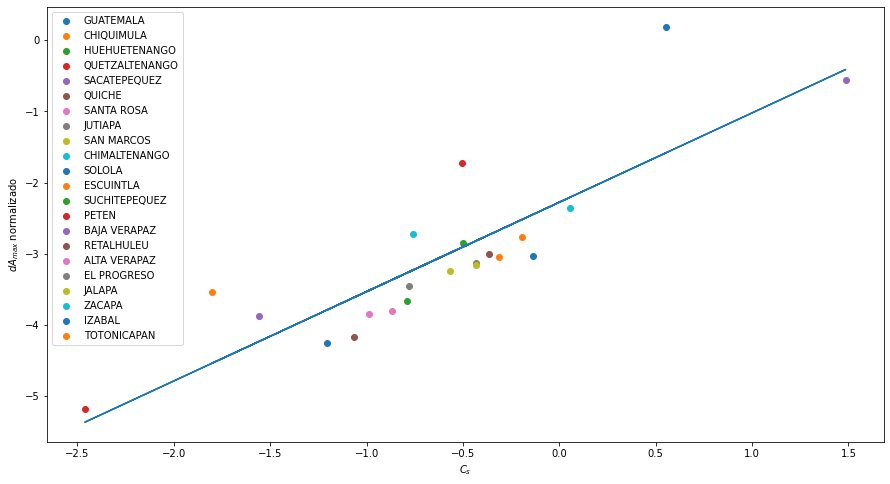

In [23]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(Densidad_Calles_superficial1[i]))
    y.append(np.log(np.array(dA_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(Densidad_Calles_superficial1[i]), np.log(np.array(dA_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Superficial de Conexiones")
plt.xlabel("$C_{s}$")
plt.ylabel("$dA_{max}$ normalizado")
plt.savefig('Percolacion/'+'DensidadSuperficialConexiones.pdf', bbox_inches = 'tight')
plt.show()

In [24]:
slope, intercept, r, p, std_err

(1.254477126195903,
 -2.2746497702938853,
 0.8526447899185805,
 4.673698640265742e-07,
 0.17189309611855996)

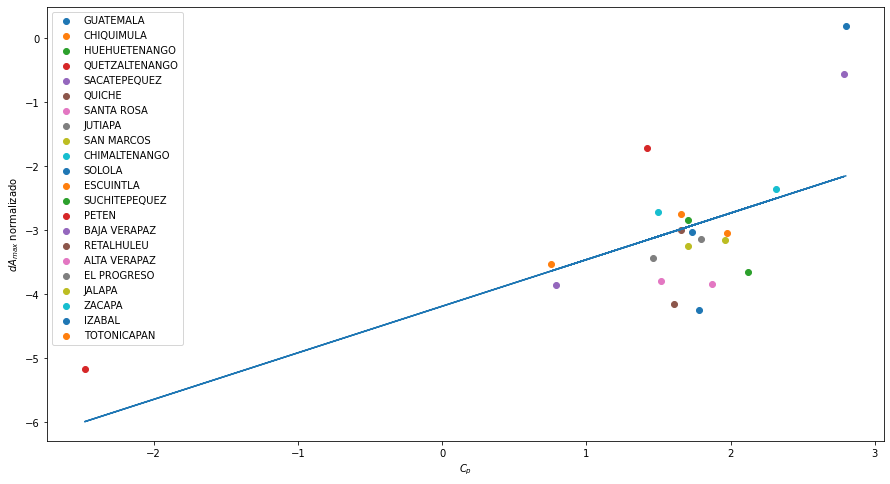

In [26]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(Densidad_Calles_perimetral1[i]))
    y.append(np.log(np.array(dA_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(Densidad_Calles_perimetral1[i]), np.log(np.array(dA_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Perimetral de Conexiones")
plt.xlabel("$C_{p}$")
plt.ylabel("$dA_{max}$ normalizado")
plt.savefig('Percolacion/'+'DensidadPerimetralConexiones.pdf', bbox_inches = 'tight')
plt.show()

In [27]:
slope, intercept, r, p, std_err

(0.7286717212525962,
 -4.191971060559958,
 0.6356229744169489,
 0.0014774764155894302,
 0.19789481961750433)